## **Essential Modules**

In [4]:
!pip install lazypredict

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression

In [6]:
face_book_metrices = pd.read_csv('/content/dataset_Facebook.csv', delimiter = ';')
face_book_metrices.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.00,2752,5091,178,109,159,3078,1640,119,4,79.00,17.00,100
1,139441,Status,2,12,3,10,0.00,10460,19057,1457,1361,1674,11710,6112,1108,5,130.00,29.00,164
2,139441,Photo,3,12,3,3,0.00,2413,4373,177,113,154,2812,1503,132,0,66.00,14.00,80
3,139441,Photo,2,12,2,10,1.00,50128,87991,2211,790,1119,61027,32048,1386,58,1572.00,147.00,1777
4,139441,Photo,2,12,2,3,0.00,7244,13594,671,410,580,6228,3200,396,19,325.00,49.00,393
5,139441,Status,2,12,1,9,0.00,10472,20849,1191,1073,1389,16034,7852,1016,1,152.00,33.00,186
6,139441,Photo,3,12,1,3,1.00,11692,19479,481,265,364,15432,9328,379,3,249.00,27.00,279
7,139441,Photo,3,12,7,9,1.00,13720,24137,537,232,305,19728,11056,422,0,325.00,14.00,339
8,139441,Status,2,12,7,3,0.00,11844,22538,1530,1407,1692,15220,7912,1250,0,161.00,31.00,192
9,139441,Photo,3,12,6,10,0.00,4694,8668,280,183,250,4309,2324,199,3,113.00,26.00,142


In [7]:
face_book_metrices.tail(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
490,85979,Photo,3,1,6,11,0.00,5280,8703,951,911,1237,5757,3300,431,1,79.00,30.00,110
491,85979,Photo,3,1,6,3,1.00,6184,10228,956,901,1140,6085,3502,437,1,105.00,46.00,152
492,85979,Link,1,1,5,11,0.00,45920,5808,753,655,763,15766,10720,220,0,128.00,9.00,137
493,85093,Photo,3,1,1,2,0.00,8412,13960,1179,1111,1632,8632,5348,699,17,185.00,55.00,257
494,85093,Photo,3,1,7,10,0.00,5400,9218,810,756,1003,5654,3230,422,10,125.00,41.00,176
495,85093,Photo,3,1,7,2,0.00,4684,7536,733,708,985,4750,2876,392,5,53.00,26.00,84
496,81370,Photo,2,1,5,8,0.00,3480,6229,537,508,687,3961,2104,301,0,53.00,22.00,75
497,81370,Photo,1,1,5,2,0.00,3778,7216,625,572,795,4742,2388,363,4,93.00,18.00,115
498,81370,Photo,3,1,4,11,0.00,4156,7564,626,574,832,4534,2452,370,7,91.00,38.00,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.00,28.00,119


## **Explore Data And Anlysis**

In [8]:
#inspect the columns of the data
face_book_metrices.info()
#note: (
    #Lifetime Post Total Reach, Lifetime Post Total Impressions, Lifetime Engaged Users, Lifetime Post Consumers, Lifetime Post Consumptions,
    #Lifetime Post Impressions by people who have liked your Page, Lifetime Post reach by people who like your Page ,
    #Lifetime People who have liked your Page and engaged with your post, comment, like, share)
# are not a possible input to predict the total transaction for a post before it is actually posted so we will need to drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [9]:
#show basic stats of the data
face_book_metrices.describe()
#note: values of each column have great range differences which why we will need to standrize it

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.00,500.00,500.00,500.00,500.00,499.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,123194.18,1.88,7.04,4.15,7.84,0.28,13903.36,29585.95,920.34,798.77,1415.13,16766.38,6585.49,609.99,7.48,177.95,27.27,212.12
std,16272.81,0.85,3.31,2.03,4.37,0.45,22740.79,76803.25,985.02,882.51,2000.59,59791.02,7682.01,612.73,21.18,323.40,42.61,380.23
min,81370.00,1.00,1.00,1.00,1.00,0.00,238.00,570.00,9.00,9.00,9.00,567.00,236.00,9.00,0.00,0.00,0.00,0.00
25%,112676.00,1.00,4.00,2.00,3.00,0.00,3315.00,5694.75,393.75,332.50,509.25,3969.75,2181.50,291.00,1.00,56.50,10.00,71.00
50%,129600.00,2.00,7.00,4.00,9.00,0.00,5281.00,9051.00,625.50,551.50,851.00,6255.50,3417.00,412.00,3.00,101.00,19.00,123.50
75%,136393.00,3.00,10.00,6.00,11.00,1.00,13168.00,22085.50,1062.00,955.50,1463.00,14860.50,7989.00,656.25,7.00,187.50,32.25,228.50
max,139441.00,3.00,12.00,7.00,23.00,1.00,180480.00,1110282.00,11452.00,11328.00,19779.00,1107833.00,51456.00,4376.00,372.00,5172.00,790.00,6334.00


In [10]:
#check for na values
face_book_metrices.isna().sum()
#note: will need to impute nan values in the paid colums with a calculated value

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [11]:
#check for duplicated rows in the dataset
face_book_metrices.duplicated().sum()

0

<Axes: >

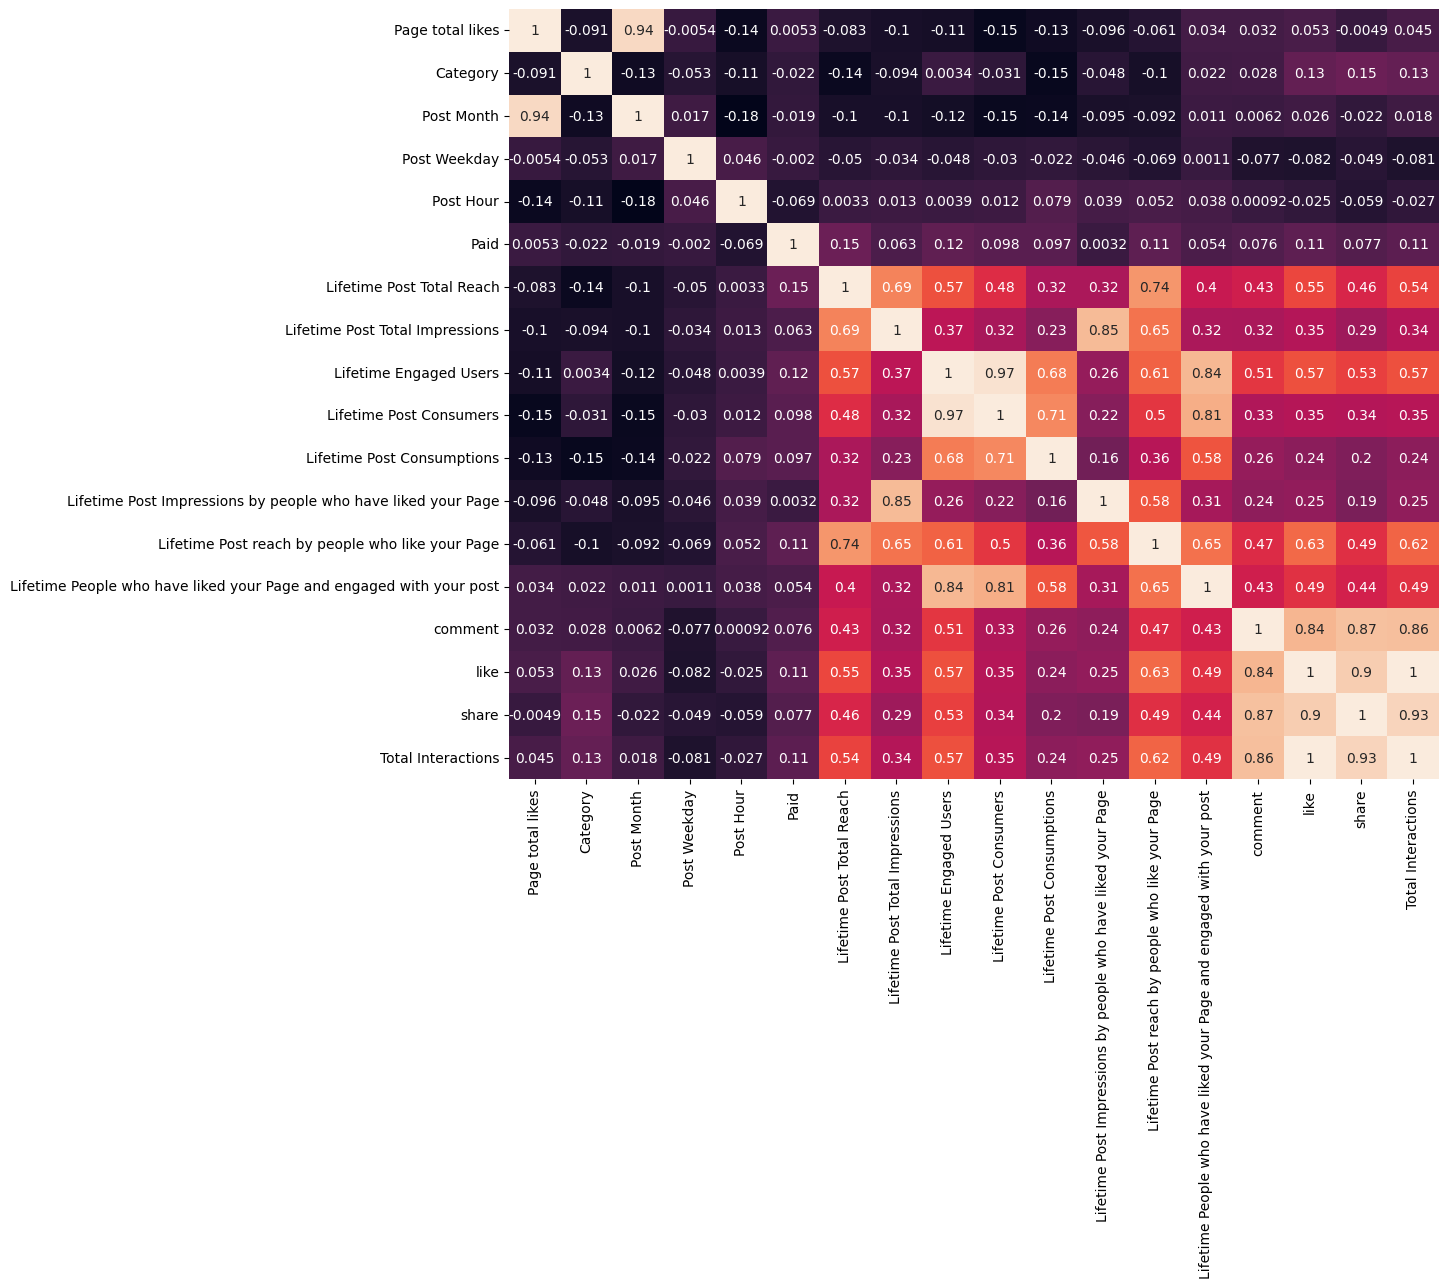

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(face_book_metrices.corr(), annot=True,cbar=False)

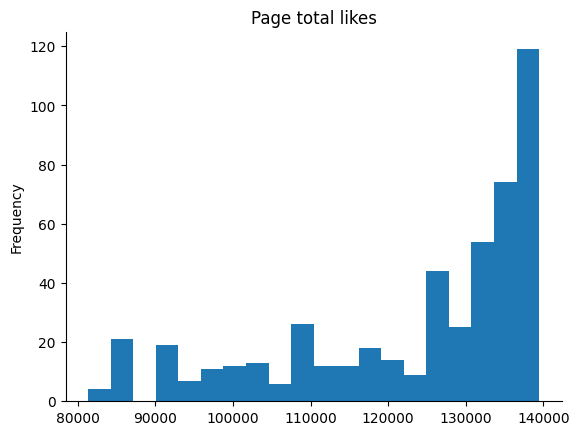

In [13]:
face_book_metrices['Page total likes'].plot(kind='hist', bins=20, title='Page total likes')
plt.gca().spines[['top', 'right',]].set_visible(False)
#note: the data values are right skewed a transformation must be applied the values are also really large(we can take the log if we want to)
 #(we will consider fixing the skewness if we are not satisfied with the model accuracy)

In [14]:
face_book_metrices['Type'].value_counts() #Link/ Photo/ Status/ Video

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [15]:
face_book_metrices['Category'].value_counts() #action/ product/ inspiration

1    215
3    155
2    130
Name: Category, dtype: int64

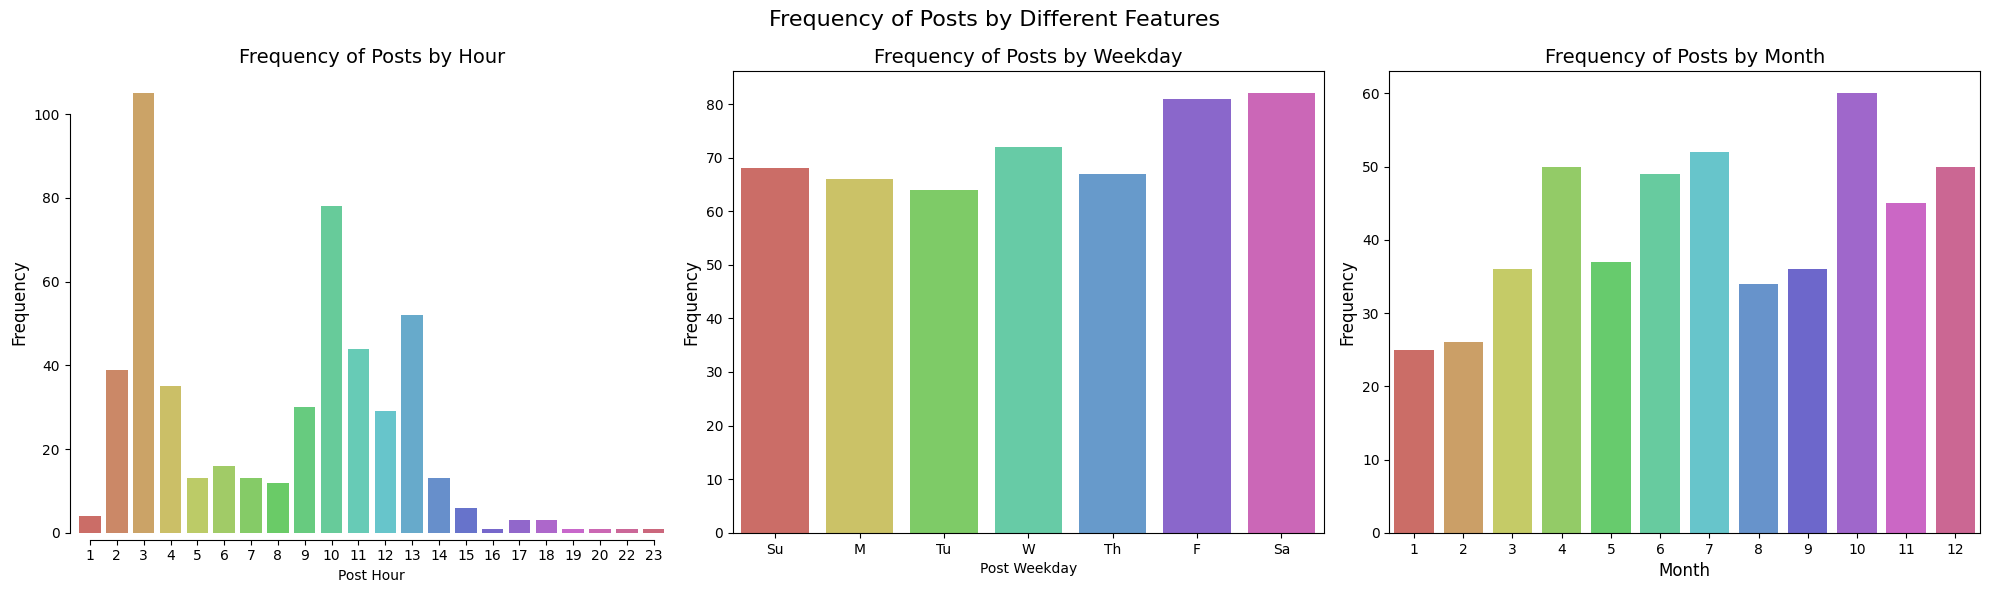

In [16]:
#how many post are there per time unit
# Hour
ffig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Hour
sns.countplot(ax=axes[0], x="Post Hour", data=face_book_metrices, palette="hls")
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Frequency of Posts by Hour", fontsize=14)
sns.despine(ax=axes[0], offset=5, trim=True)

# Weekday
sns.countplot(ax=axes[1], x="Post Weekday", data=face_book_metrices, palette="hls")
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Frequency of Posts by Weekday", fontsize=14)
handles = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
labels = [0, 1, 2, 3, 4, 5, 6]
axes[ 1].set_xticks(labels, handles)
# sns.despine(ax=axes[1, 0], offset=5, trim=True)

# Month
sns.countplot(ax=axes[2], x="Post Month", data=face_book_metrices, palette="hls")
axes[2].set_xlabel("Month", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)
axes[2].set_title("Frequency of Posts by Month", fontsize=14)
# sns.despine(ax=axes[2, 0], offset=5, trim=True)

# Suptitle and tight layout
plt.suptitle("Frequency of Posts by Different Features", fontsize=16)
plt.tight_layout()
plt.show()
#take away: no great difference in post frequency by weekday, moderate difference in frequency by month, great diiference with hour

Text(0.5, 1.0, 'Frequency of Posts by Category')

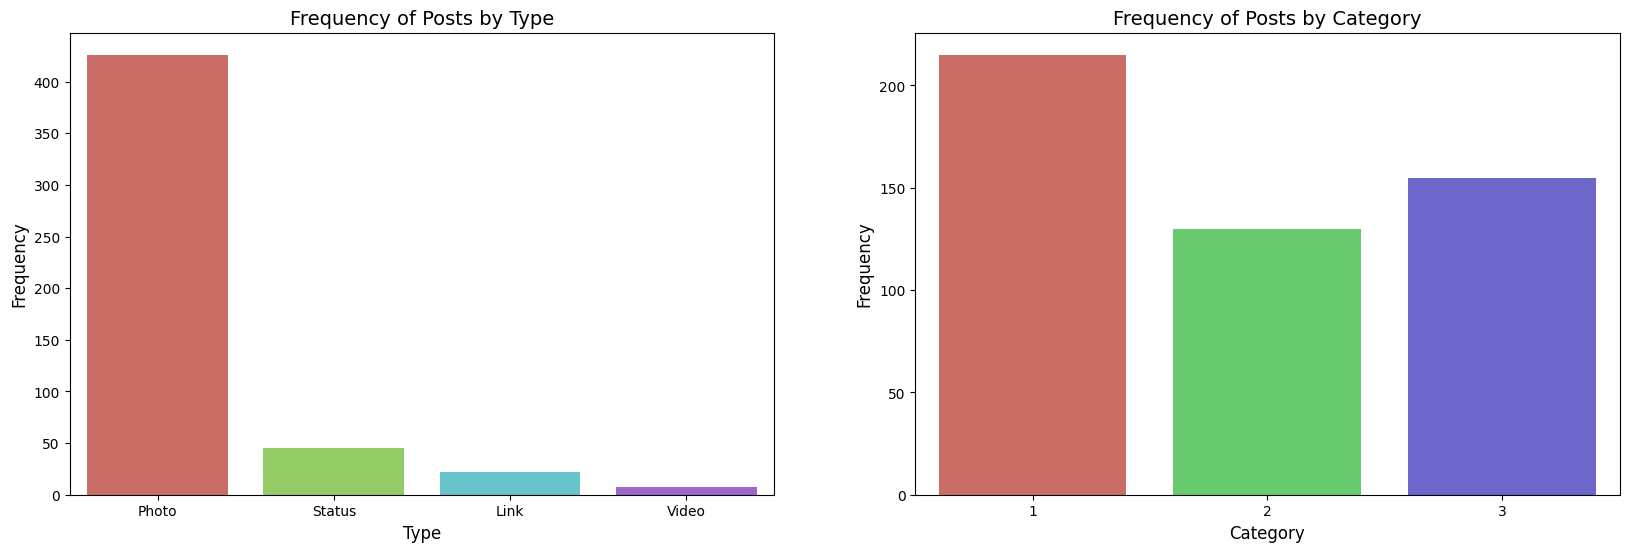

In [17]:
ffig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Type
sns.countplot(ax=axes[0], x="Type", data=face_book_metrices, palette="hls")
axes[0].set_xlabel("Type", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Frequency of Posts by Type", fontsize=14)
# sns.despine(ax=axes[0, 1], offset=5, trim=True)

# Category
sns.countplot(ax=axes[1], x="Category", data=face_book_metrices, palette="hls")
axes[1].set_xlabel("Category", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Frequency of Posts by Category", fontsize=14)
# sns.despine(ax=axes[1, 1], offset=5, trim=True)
#take away: post with photos are the most frequent, catagory one and two are close enough but 1 is the greatest

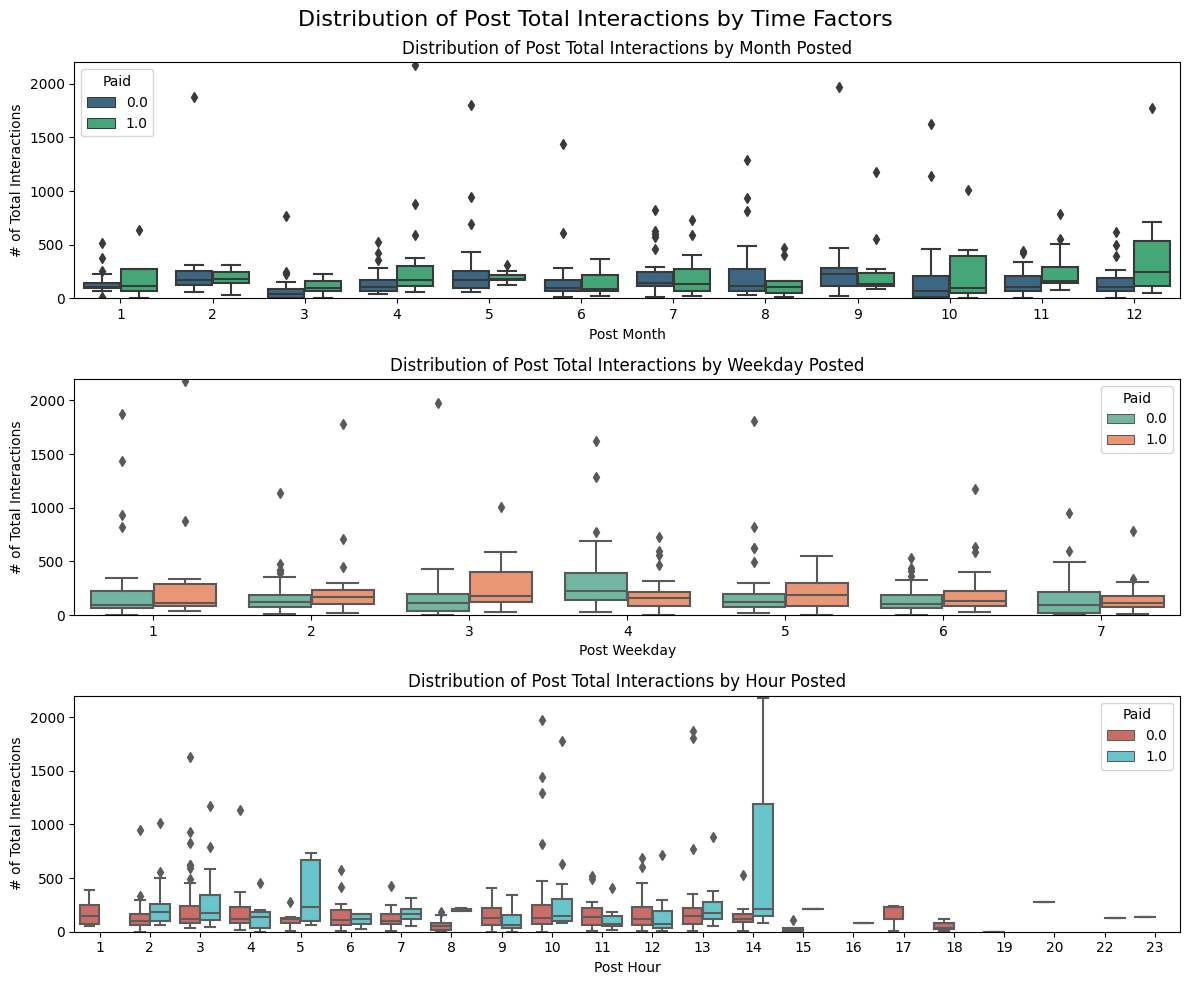

<Figure size 640x480 with 0 Axes>

In [18]:
#the distribution of total interaction each paid post vs non-paidbpost gets iper specific month/ day/ hour

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# First plot (already provided)
sns.boxplot(ax=axes[0], x="Post Month", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="viridis")
axes[0].set_ylim(0, 2200)
axes[0].set_title("Distribution of Post Total Interactions by Month Posted")
axes[0].set_ylabel("# of Total Interactions")

# Second plot (variation: using "Type" as hue)
sns.boxplot(ax=axes[1], x="Post Weekday", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="Set2")
axes[1].set_ylim(0, 2200)
axes[1].set_title("Distribution of Post Total Interactions by Weekday Posted")
axes[1].set_ylabel("# of Total Interactions")
# axes[1].legend(title="Type", loc="lower right")

# Third plot (variation: using "Category" as hue and different color palette)
sns.boxplot(ax=axes[2], x="Post Hour", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="hls")
axes[2].set_ylim(0, 2200)
axes[2].set_title("Distribution of Post Total Interactions by Hour Posted")
axes[2].set_ylabel("# of Total Interactions")
# axes[2].legend(title="Category", loc="lower right")

plt.suptitle("Distribution of Post Total Interactions by Time Factors", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("filename.png", dpi=300)



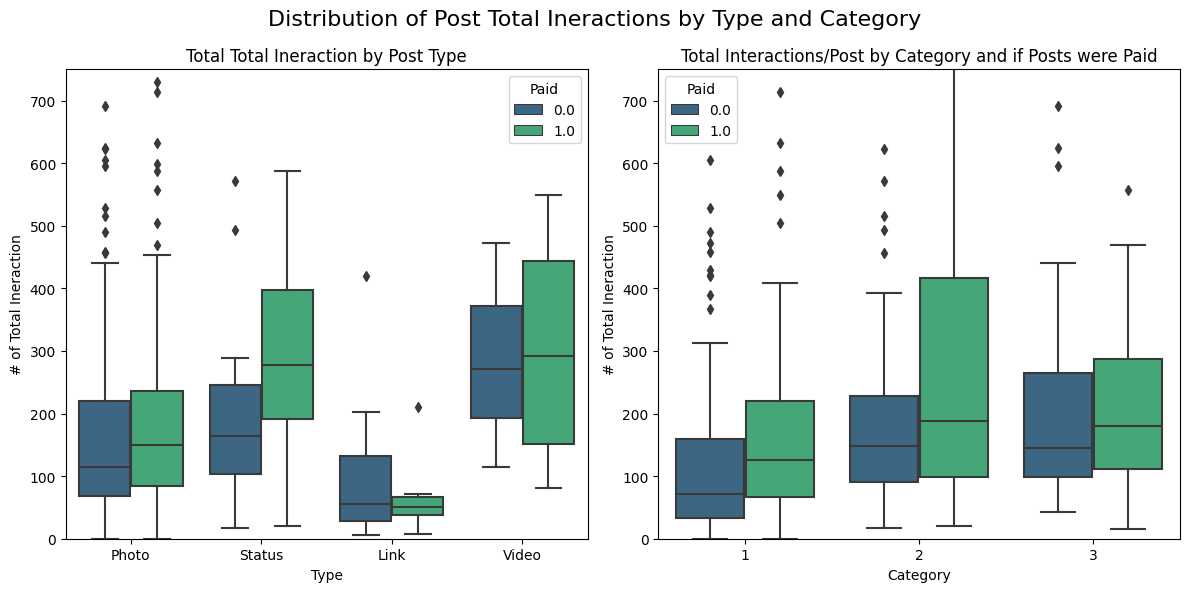

<Figure size 640x480 with 0 Axes>

In [19]:
#the distribution of total interaction each paid post vs non-paidbpost gets iper specific type/ category

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Type vs Likes
sns.boxplot(ax=axes[0], x="Type", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="viridis")
axes[0].set_ylim(0, 750)
axes[0].set_title("Total Total Ineraction by Post Type")
axes[0].set_ylabel("# of Total Ineraction")
axes[0].legend(title="Paid", loc="upper right")


# Second plot: Category vs Likes
sns.boxplot(ax=axes[1], x="Category", y="Total Interactions", data=face_book_metrices, hue="Paid", palette="viridis")
axes[1].set_ylim(0, 750)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("# of Total Ineraction")
axes[1].legend(title="Paid", loc="upper left")
axes[1].set_title("Total Interactions/Post by Category and if Posts were Paid")

plt.suptitle("Distribution of Post Total Ineractions by Type and Category", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("Distribution of Post Total Ineractions by Type and Category.png", dpi=300)
#it is very clear that there is a strong positive correlation between the paid posts interactions
#catagory one is the least in interactions
#link posts are the worst no matter paid or not
#photos are second after videos but viseos count is much less

## **Data Preprocessing**

In [20]:
#impute the nan values in the paid coulmn
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
face_book_metrices['Paid'] = imputer.fit_transform(face_book_metrices[['Paid']])

In [21]:
#drop non needed columns
face_book_metrices.drop(face_book_metrices.iloc[:, 7:18], inplace = True, axis = 1)
face_book_metrices.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,139441,Photo,2,12,4,3,0.00,100
1,139441,Status,2,12,3,10,0.00,164
2,139441,Photo,3,12,3,3,0.00,80
3,139441,Photo,2,12,2,10,1.00,1777
4,139441,Photo,2,12,2,3,0.00,393
5,139441,Status,2,12,1,9,0.00,186
6,139441,Photo,3,12,1,3,1.00,279
7,139441,Photo,3,12,7,9,1.00,339
8,139441,Status,2,12,7,3,0.00,192
9,139441,Photo,3,12,6,10,0.00,142


In [22]:
def label_encoding(df, column_name):
    if column_name in df.columns:
        # Map the non-numeric column to numbers
        df[column_name] = pd.factorize(df[column_name], sort=True)[0]
    return df

In [23]:
label_encoding(face_book_metrices, 'Type')

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,139441,1,2,12,4,3,0.00,100
1,139441,2,2,12,3,10,0.00,164
2,139441,1,3,12,3,3,0.00,80
3,139441,1,2,12,2,10,1.00,1777
4,139441,1,2,12,2,3,0.00,393
...,...,...,...,...,...,...,...,...
495,85093,1,3,1,7,2,0.00,84
496,81370,1,2,1,5,8,0.00,75
497,81370,1,1,1,5,2,0.00,115
498,81370,1,3,1,4,11,0.00,136


In [24]:
# face_book_metrices['Page total likes'] = np.log(face_book_metrices['Page total likes'])
# face_book_metrices

In [25]:
def Weekday(x):
    weekdays = {
        1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thrusday",
        6: "Friday",
        7: "Sauterday",
    }
    return weekdays[x]
face_book_metrices['Post Weekday'].apply(Weekday)

0      Wednesday
1        Tuesday
2        Tuesday
3         Monday
4         Monday
         ...    
495    Sauterday
496     Thrusday
497     Thrusday
498    Wednesday
499    Wednesday
Name: Post Weekday, Length: 500, dtype: object

In [26]:
#span the months to a dataframe
months_df = pd.get_dummies(face_book_metrices['Post Month'],prefix='Mo')
face_book_metrices = pd.concat([face_book_metrices,months_df],axis=1)

In [27]:
#span the week days to a dataframe
days_df = pd.get_dummies(face_book_metrices['Post Weekday'], prefix='day')
face_book_metrices = pd.concat([face_book_metrices,days_df],axis=1)

In [28]:
#span the hours to a dataframe
hours_df = pd.get_dummies(face_book_metrices['Post Hour'],prefix='hour')
face_book_metrices = pd.concat([face_book_metrices,hours_df],axis=1)

In [29]:
#span the tpes to a data frame
types_df = pd.get_dummies(face_book_metrices['Type'], prefix='type')
face_book_metrices = pd.concat([face_book_metrices,types_df],axis=1)

In [30]:
#span the categroies to a dataframe
category_df = pd.get_dummies(face_book_metrices['Category'], prefix='category')
face_book_metrices = pd.concat([face_book_metrices,category_df],axis=1)

In [31]:
face_book_metrices.drop(["Post Month", "Post Weekday", "Post Hour", "Type", "Category"], axis=1, inplace=True)

In [32]:
face_book_metrices.columns

Index(['Page total likes', 'Paid', 'Total Interactions', 'Mo_1', 'Mo_2',
       'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10',
       'Mo_11', 'Mo_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_22', 'hour_23', 'type_0', 'type_1',
       'type_2', 'type_3', 'category_1', 'category_2', 'category_3'],
      dtype='object')

## **Feature Selection**

Set of features: The Pearson correlation coefficient. For pairs of features having a
correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity

<Axes: >

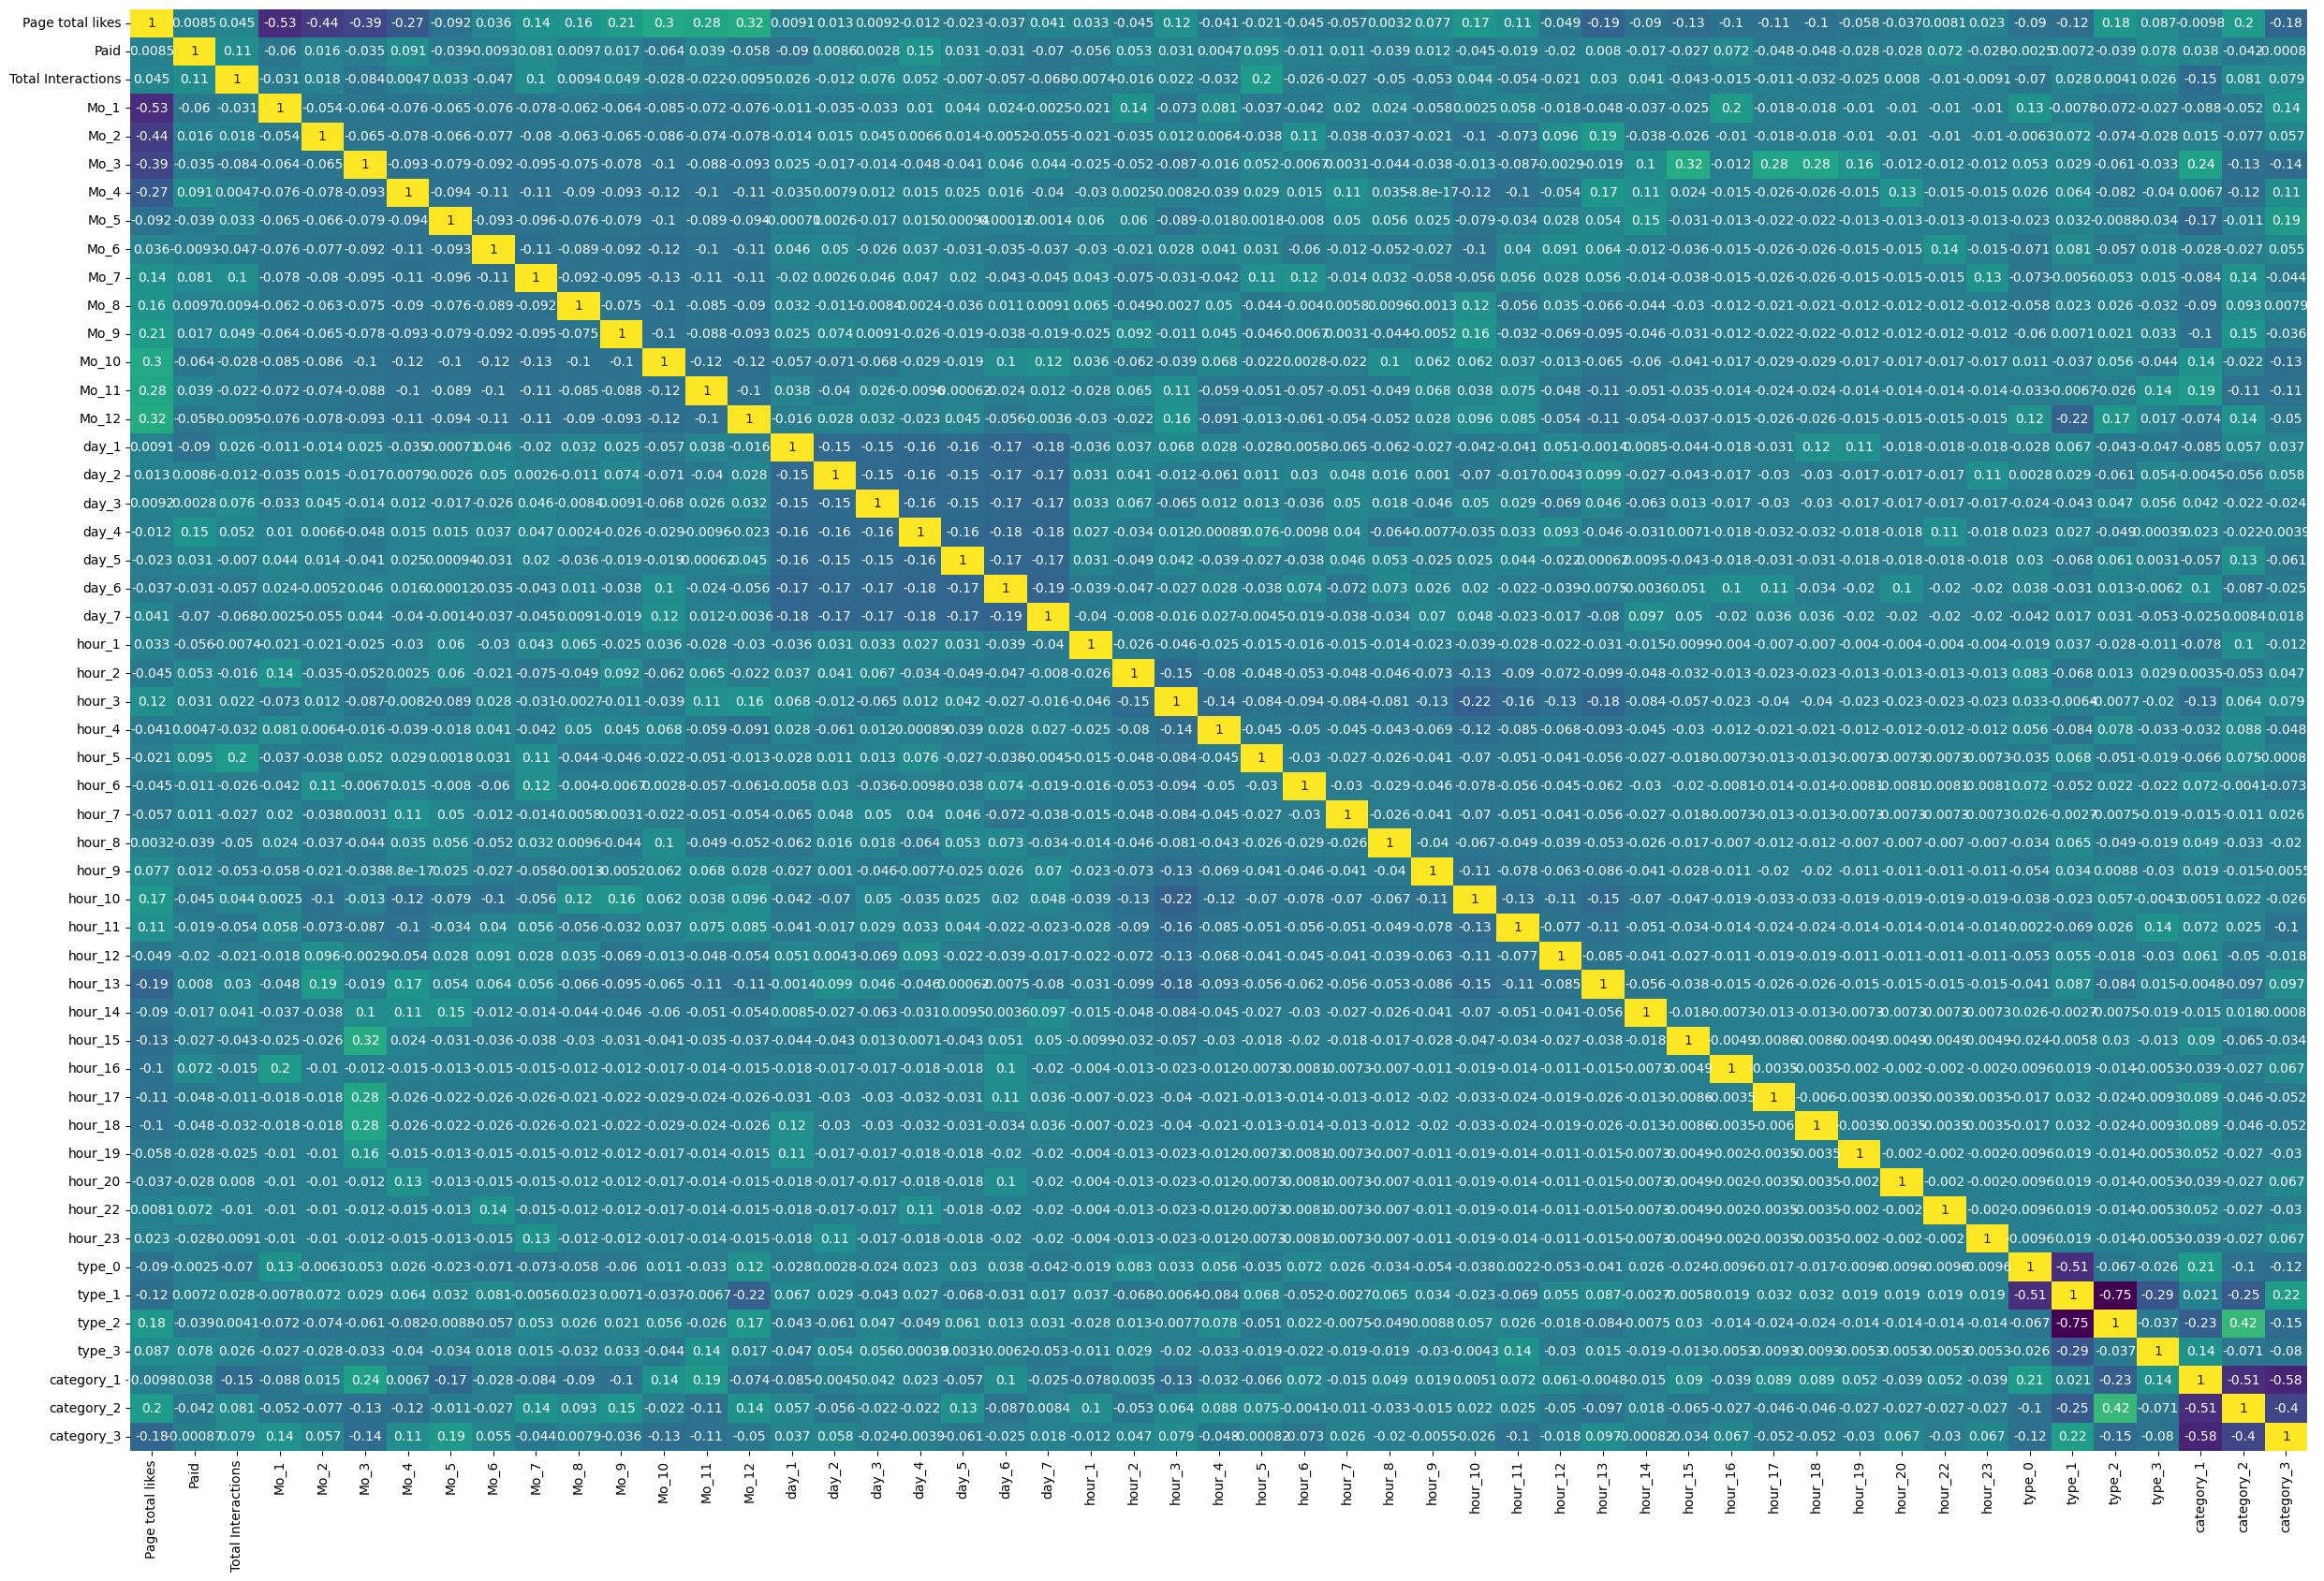

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(face_book_metrices.corr(),cmap='viridis',annot=True,cbar=False)

In [34]:
# Calculate the Pearson correlation matrix
corr_matrix = face_book_metrices.corr().abs()
# Calculate the Pearson correlation matrix
corr_matrix = face_book_metrices.corr().abs()
# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Find pairs of features with correlation coefficient > 0.8
high_corr_pairs = np.where(mask & (corr_matrix > 0.8))
# Set to store the features to drop
features_to_drop = set()
# Iterate over the indices of highly correlated feature pairs
for i, j in zip(*high_corr_pairs):
    if i != j:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        if feature_i not in features_to_drop:
            features_to_drop.add(feature_j)
# Drop the selected features from your dataset
face_book_metrices_pearson_filtered = face_book_metrices.drop(features_to_drop, axis=1)

In [35]:
face_book_metrices_pearson_filtered.columns

Index(['Page total likes', 'Paid', 'Total Interactions', 'Mo_1', 'Mo_2',
       'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10',
       'Mo_11', 'Mo_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_22', 'hour_23', 'type_0', 'type_1',
       'type_2', 'type_3', 'category_1', 'category_2', 'category_3'],
      dtype='object')

Decide On the most relevant features
a tree-based models, such as Random Forest or Gradient Boosting models. These models can provide a measure of feature importance based on how much each feature contributes to the overall predictive performance.

In [36]:
X = face_book_metrices_pearson_filtered.drop('Total Interactions', axis =1)
y = face_book_metrices_pearson_filtered['Total Interactions']
# Create a Random Forest model
model = RandomForestRegressor()

# Fit the model on your data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

             Feature  Importance
16             day_3        0.21
0   Page total likes        0.15
14             day_1        0.07
1               Paid        0.06
25            hour_5        0.05
8               Mo_7        0.05
6               Mo_5        0.03
15             day_2        0.03
30           hour_10        0.03
17             day_4        0.02
11             Mo_10        0.02
49        category_3        0.02
23            hour_3        0.02
47        category_1        0.02
33           hour_13        0.02
18             day_5        0.02
34           hour_14        0.02
48        category_2        0.02
9               Mo_8        0.01
3               Mo_2        0.01
24            hour_4        0.01
10              Mo_9        0.01
19             day_6        0.01
22            hour_2        0.01
5               Mo_4        0.01
7               Mo_6        0.01
20             day_7        0.01
32           hour_12        0.01
4               Mo_3        0.01
12        

In [37]:
# Filter the features based on importance threshold
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
# Print the selected features/
final_features = list(selected_features)

In [38]:
final_dataframe = face_book_metrices_pearson_filtered[final_features]
final_dataframe['Total Interaction'] = face_book_metrices_pearson_filtered['Total Interactions']
final_dataframe.head()

,day_3,Page total likes,day_1,Paid,hour_5,Mo_7,Mo_5,day_2,hour_10,day_4,...,hour_13,day_5,hour_14,category_2,Mo_8,Mo_2,hour_4,Mo_9,day_6,Total Interaction
0,0,139441,0,0.00,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,100
1,1,139441,0,0.00,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,164
2,1,139441,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
3,0,139441,0,1.00,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1777
4,0,139441,0,0.00,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,393


## **Model Selection**

## **Modeling**

In [39]:
X = final_dataframe.drop('Total Interaction', axis = 1)
y = final_dataframe['Total Interaction']

In [40]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [41]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:06<00:00,  6.16it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 21
[LightGBM] [Info] Start training from score 223.890000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [42]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,-0.30,0.00,152.65,0.06
SVR,-0.38,-0.06,156.99,0.08
HuberRegressor,-0.42,-0.09,159.34,0.03
LassoLarsCV,-0.50,-0.15,163.73,0.05
DummyRegressor,-0.50,-0.15,163.73,0.05
LassoCV,-0.50,-0.15,163.73,0.11
LarsCV,-0.50,-0.15,163.73,0.11
PassiveAggressiveRegressor,-0.54,-0.18,165.85,0.02
ElasticNetCV,-0.54,-0.18,165.94,0.24


In [43]:
# Create an instance of the SVM regressor
regressor = SVR()

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the regressor using mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 98.60460329798754


## **Hyperparamter Tuning & Gred Search**

In [44]:
# Create an instance of the SVR regressor
regressor = SVR()

# Define the parameter grid for grid search
param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_regressor = grid_search.best_estimator_

# Train the best regressor on the training data
best_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_regressor.predict(X_test)

Given the model week preformance after the feature engineering, the different models experimentations and the hyperparmeter fine tuning. The data is not a good representation for the target.